<a href="https://colab.research.google.com/github/rafaa87/Project/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Segmentation des Fournisseurs par Risque Financier

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

# Cela ouvre un sélecteur de fichiers sur ton PC
uploaded = files.upload()




Saving dbo.Dim_Category.csv to dbo.Dim_Category (1).csv
Saving dbo.Dim_Customer.csv to dbo.Dim_Customer.csv
Saving dbo.Dim_Dispute.csv to dbo.Dim_Dispute.csv
Saving dbo.Dim_operation.csv to dbo.Dim_operation.csv
Saving dbo.Dim_Orders.csv to dbo.Dim_Orders.csv
Saving dbo.Dim_PayementSupp.csv to dbo.Dim_PayementSupp.csv
Saving dbo.Dim_Product.csv to dbo.Dim_Product.csv
Saving dbo.Dim_Statment.csv to dbo.Dim_Statment.csv
Saving dbo.Dim_Store.csv to dbo.Dim_Store.csv
Saving dbo.Dim_Supplier.csv to dbo.Dim_Supplier.csv
Saving dbo.Fact_Audit.csv to dbo.Fact_Audit.csv
Saving dbo.Fact_Finance.csv to dbo.Fact_Finance.csv
Saving dbo.Fact_Vente.csv to dbo.Fact_Vente.csv


In [ ]:
import os
print(os.listdir())


['.config', 'dbo.Dim_Dispute.csv', 'dbo.Dim_operation.csv', 'dbo.Dim_Store.csv', 'dbo.Dim_Orders.csv', 'dbo.Fact_Audit.csv', 'dbo.Dim_Supplier.csv', 'dbo.Dim_PayementSupp.csv', 'dbo.Dim_Customer.csv', 'dbo.Dim_Statment.csv', 'dbo.Dim_Category (1).csv', 'dbo.Fact_Vente.csv', 'sample_data', 'dbo.Fact_Finance.csv', 'dbo.Dim_Product.csv', 'dbo.Dim_Category.csv']


In [ ]:
import pandas as pd

fact_finance = pd.read_csv('dbo.Fact_Finance.csv')
fact_audit = pd.read_csv('dbo.Fact_Audit.csv')


In [ ]:
# Fusion et agrégation des données
supplier_risk = fact_audit.groupby('Pk_supplier').agg({
    'AmountDue': 'mean',
    'BalanceDue': 'mean'
}).reset_index()


In [ ]:
# Fusion avec les données financières
supplier_risk = supplier_risk.merge(
    fact_finance.groupby('Pk_Statment').first().reset_index(),
    left_on='Pk_supplier',
    right_on='Pk_Statment',
    how='left'
)

In [ ]:
# Sélection et nettoyage des features
features = ['AmountDue', 'BalanceDue', 'TotalLiabilities']
X = supplier_risk[features].fillna(0)  # Remplacer les NaN par 0

In [ ]:
# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Clustering K-means
kmeans = KMeans(n_clusters=3, random_state=42)
supplier_risk['cluster'] = kmeans.fit_predict(X_scaled)


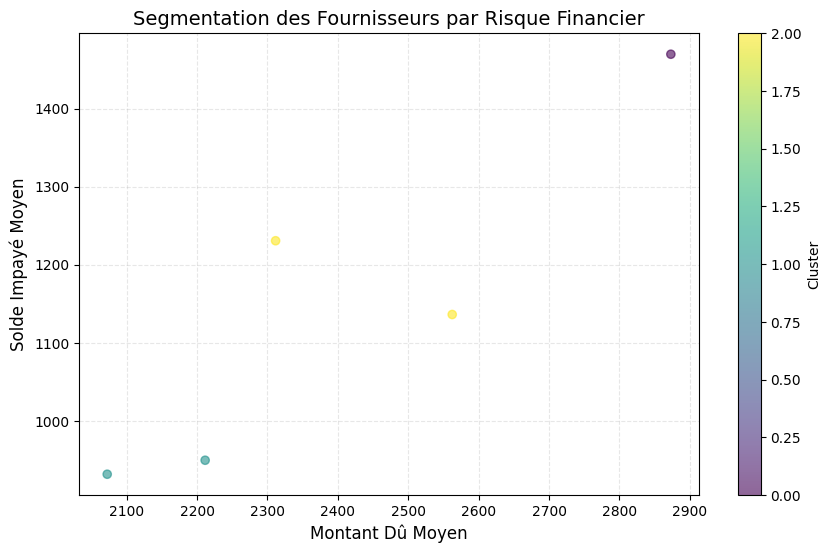

In [ ]:
# Visualisation
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    supplier_risk['AmountDue'],
    supplier_risk['BalanceDue'],
    c=supplier_risk['cluster'],
    cmap='viridis',
    alpha=0.6
)

plt.title('Segmentation des Fournisseurs par Risque Financier', fontsize=14)
plt.xlabel('Montant Dû Moyen', fontsize=12)
plt.ylabel('Solde Impayé Moyen', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [ ]:
la classification des litiges "Non-conformité

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import (classification_report,
                            confusion_matrix,
                            roc_auc_score,
                            precision_recall_curve,
                            average_precision_score)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

# Cela ouvre un sélecteur de fichiers sur ton PC
uploaded = files.upload()




Saving dbo.Dim_Category.csv to dbo.Dim_Category.csv
Saving dbo.Dim_Customer.csv to dbo.Dim_Customer.csv
Saving dbo.Dim_Dispute.csv to dbo.Dim_Dispute.csv
Saving dbo.Dim_operation.csv to dbo.Dim_operation.csv
Saving dbo.Dim_Orders.csv to dbo.Dim_Orders.csv
Saving dbo.Dim_PayementSupp.csv to dbo.Dim_PayementSupp.csv
Saving dbo.Dim_Product.csv to dbo.Dim_Product.csv
Saving dbo.Dim_Statment.csv to dbo.Dim_Statment.csv
Saving dbo.Dim_Store.csv to dbo.Dim_Store.csv
Saving dbo.Dim_Supplier.csv to dbo.Dim_Supplier.csv
Saving dbo.Fact_Audit.csv to dbo.Fact_Audit.csv
Saving dbo.Fact_Finance.csv to dbo.Fact_Finance.csv
Saving dbo.Fact_Vente.csv to dbo.Fact_Vente.csv


In [ ]:
# 1. Chargement des données (version CSV)
dim_dispute = pd.read_csv('dbo.Dim_Dispute.csv')
fact_audit = pd.read_csv('dbo.Fact_Audit.csv')

In [ ]:
# 2. Fusion et préparation des données
df = fact_audit.merge(dim_dispute, on='Pk_Dispute', how='left')


In [ ]:
# Création de la variable cible avec gestion des valeurs manquantes
df['target'] = df['Reason'].apply(lambda x: 1 if x == 'Non-conformité' else 0)

In [ ]:
# 3. Feature Engineering amélioré
features = [
    'AmountDue',
    'AmountPaid',
    'BalanceDue',
    'VATRate',
    'DiscountOffered',
    'RecommendedProfitMargin'
]


In [ ]:
# Gestion des valeurs manquantes et préparation
X = df[features].fillna(0)
y = df['target']



Distribution des classes :
target
0    1.0
Name: proportion, dtype: float64


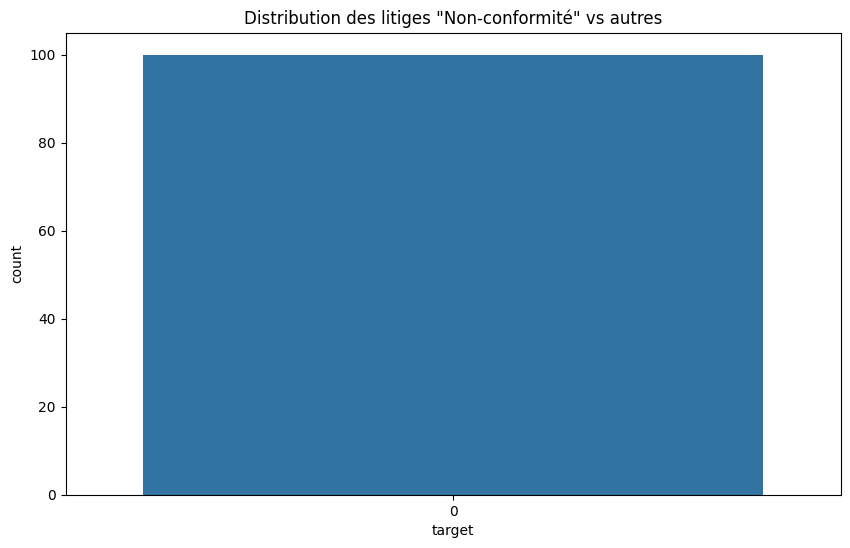

In [ ]:
# 4. Analyse exploratoire
print("\nDistribution des classes :")
print(y.value_counts(normalize=True))

plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title('Distribution des litiges "Non-conformité" vs autres')
plt.show()


In [ ]:
# 5. Split des données avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Important pour les données déséquilibrées
)

In [ ]:
print(y_train.value_counts())


target
0    80
Name: count, dtype: int64


In [ ]:
# 6. Modèle XGBoost optimisé
model = XGBClassifier(
    eval_metric='logloss',
    random_state=42,

    max_depth=5,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=10
)

In [ ]:
# Entraînement avec validation set
eval_set = [(X_test, y_test)]
model.fit(
    X_train, y_train,
    eval_set=eval_set,
    verbose=True
)

[0]	validation_0-logloss:0.11569
[1]	validation_0-logloss:0.10566
[2]	validation_0-logloss:0.09671
[3]	validation_0-logloss:0.08840
[4]	validation_0-logloss:0.08093
[5]	validation_0-logloss:0.07414
[6]	validation_0-logloss:0.06819
[7]	validation_0-logloss:0.06284
[8]	validation_0-logloss:0.05797
[9]	validation_0-logloss:0.05347
[10]	validation_0-logloss:0.04935
[11]	validation_0-logloss:0.04574
[12]	validation_0-logloss:0.04245
[13]	validation_0-logloss:0.03946
[14]	validation_0-logloss:0.03668
[15]	validation_0-logloss:0.03414
[16]	validation_0-logloss:0.03190
[17]	validation_0-logloss:0.02983
[18]	validation_0-logloss:0.02795
[19]	validation_0-logloss:0.02625
[20]	validation_0-logloss:0.02461
[21]	validation_0-logloss:0.02315
[22]	validation_0-logloss:0.02180
[23]	validation_0-logloss:0.02054
[24]	validation_0-logloss:0.01943
[25]	validation_0-logloss:0.01838
[26]	validation_0-logloss:0.01742
[27]	validation_0-logloss:0.01651
[28]	validation_0-logloss:0.01651
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


=== Rapport de classification ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


=== Matrice de confusion ===


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


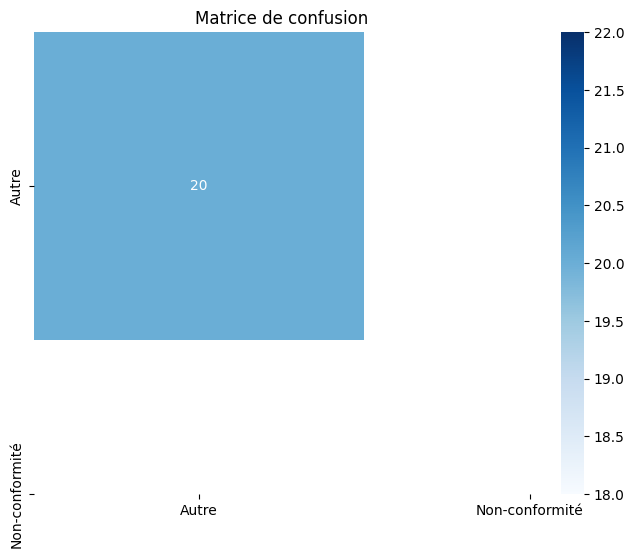


AUC-ROC: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [ ]:
# 7. Évaluation complète
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\n=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("\n=== Matrice de confusion ===")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Autre', 'Non-conformité'],
            yticklabels=['Autre', 'Non-conformité'])
plt.title('Matrice de confusion')
plt.show()

print(f"\nAUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")


In [ ]:
prevision des ventes mensuelles

In [ ]:
from google.colab import files

# Cela ouvre un sélecteur de fichiers sur ton PC
uploaded = files.upload()



Saving dbo.Dim_Category.csv to dbo.Dim_Category (1).csv
Saving dbo.Dim_Customer.csv to dbo.Dim_Customer (1).csv
Saving dbo.Dim_Dispute.csv to dbo.Dim_Dispute (1).csv
Saving dbo.Dim_operation.csv to dbo.Dim_operation (1).csv
Saving dbo.Dim_Orders.csv to dbo.Dim_Orders (1).csv
Saving dbo.Dim_PayementSupp.csv to dbo.Dim_PayementSupp (1).csv
Saving dbo.Dim_Product.csv to dbo.Dim_Product (1).csv
Saving dbo.Dim_Statment.csv to dbo.Dim_Statment (1).csv
Saving dbo.Dim_Store.csv to dbo.Dim_Store (1).csv
Saving dbo.Dim_Supplier.csv to dbo.Dim_Supplier (1).csv
Saving dbo.Fact_Audit.csv to dbo.Fact_Audit (1).csv
Saving dbo.Fact_Finance.csv to dbo.Fact_Finance (1).csv
Saving dbo.Fact_Vente.csv to dbo.Fact_Vente (1).csv


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Préparation des données temporelles
fact_vente = pd.read_csv('dbo.Fact_Vente.csv')
fact_vente['Date'] = pd.date_range(start='2023-01-01', periods=len(fact_vente), freq='D')
monthly_sales = fact_vente.resample('M', on='Date')['Amount'].sum()

<ipython-input-34-84d68f290d57>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = fact_vente.resample('M', on='Date')['Amount'].sum()


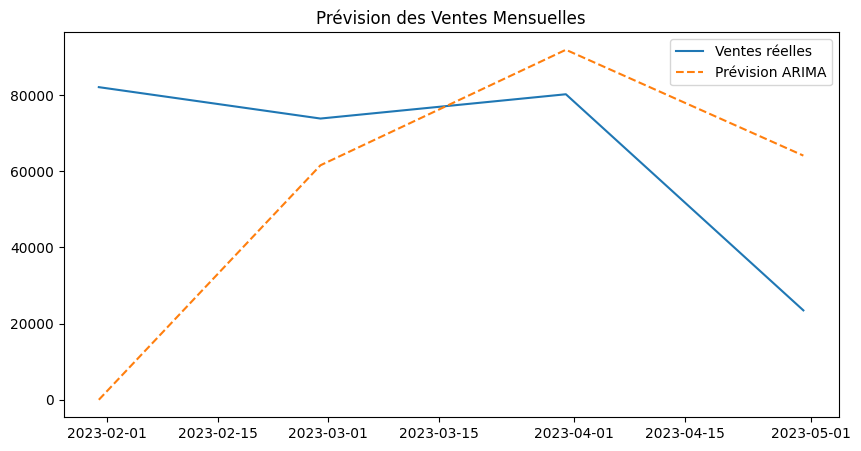

In [ ]:
import matplotlib.pyplot as plt

# Prévision
pred = results.predict(start=0, end=len(monthly_sales)-1, dynamic=False)

# Affichage
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales, label='Ventes réelles')
plt.plot(pred, label='Prévision ARIMA', linestyle='--')
plt.title('Prévision des Ventes Mensuelles')
plt.legend()
plt.show()


In [ ]:
prédiction des montants des litiges

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files

# Cela ouvre un sélecteur de fichiers sur ton PC
uploaded = files.upload()

Saving dbo.Fact_Audit.csv to dbo.Fact_Audit.csv


In [ ]:
# Chargement des données
df = pd.read_csv('dbo.Fact_Audit.csv')

In [ ]:
# Préparation ultra-simple
X = df[['AmountDue', 'VATRate']].fillna(0)  # Seulement 2 variables clés
y = df['AmountPaid']


In [ ]:
# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modèle avec paramètres de base
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Évaluation en une ligne
print(f"Score R²: {model.score(X_test, y_test):.2f}")

Score R²: 0.35


In [ ]:
# Prédiction exemple
exemple = [[1000, 20]]  # AmountDue=1000, VATRate=20%
print(f"Montant prédit: {model.predict(exemple)[0]:.2f}€")

Montant prédit: 480.36€


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Ajouter ceci pour voir l'importance des variables
importances = pd.Series(model.feature_importances_, index=X.columns)
print("\nImportance des variables:")
print(importances.sort_values(ascending=False))


Importance des variables:
AmountDue    0.930177
VATRate      0.069823
dtype: float64


In [ ]:
predire combien le fournisseur va reelemnet payer

In [ ]:
import pandas as pd

from google.colab import files

# Cela ouvre un sélecteur de fichiers sur ton PC
uploaded = files.upload()



Saving dbo.Fact_Audit.csv to dbo.Fact_Audit (1).csv


In [ ]:
# Chargement des données
df = pd.read_csv('dbo.Fact_Audit.csv')

In [ ]:
X = df[['AmountDue', 'VATRate', 'DiscountOffered', 'RecommendedProfitMargin']].fillna(0)
y = df['AmountPaid']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Score R² : {r2:.2f}")
print(f"RMSE : {rmse:.2f}")

Score R² : 0.31
RMSE : 816.91


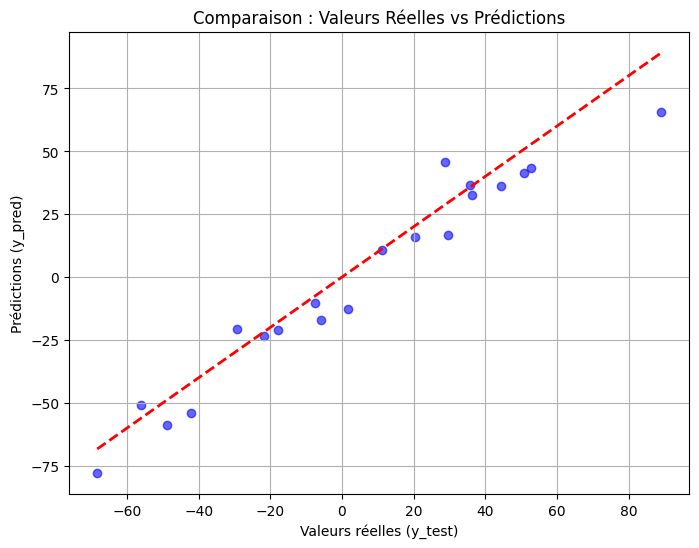

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Générer des données fictives
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Séparer en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Prédictions (y_pred)')
plt.title('Comparaison : Valeurs Réelles vs Prédictions')
plt.grid(True)
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud



In [ ]:
from google.colab import files

# Cela ouvre un sélecteur de fichiers sur ton PC
uploaded = files.upload()

Saving dbo.Dim_Category.csv to dbo.Dim_Category.csv
Saving dbo.Dim_Customer.csv to dbo.Dim_Customer.csv
Saving dbo.Dim_Dispute.csv to dbo.Dim_Dispute.csv
Saving dbo.Dim_operation.csv to dbo.Dim_operation.csv
Saving dbo.Dim_Orders.csv to dbo.Dim_Orders.csv
Saving dbo.Dim_PayementSupp.csv to dbo.Dim_PayementSupp.csv
Saving dbo.Dim_Product.csv to dbo.Dim_Product.csv
Saving dbo.Dim_Statment.csv to dbo.Dim_Statment.csv
Saving dbo.Dim_Store.csv to dbo.Dim_Store.csv
Saving dbo.Dim_Supplier.csv to dbo.Dim_Supplier.csv
Saving dbo.Fact_Audit.csv to dbo.Fact_Audit.csv
Saving dbo.Fact_Finance.csv to dbo.Fact_Finance.csv
Saving dbo.Fact_Vente.csv to dbo.Fact_Vente.csv


In [ ]:
# Chargement des données
categories = pd.read_csv('dbo.Dim_Category.csv')
products = pd.read_csv('dbo.Dim_Product.csv')
customers = pd.read_csv('dbo.Dim_Customer.csv')
orders = pd.read_csv('dbo.Dim_Orders.csv')
suppliers = pd.read_csv('dbo.Dim_Supplier.csv')

# Nettoyage des données
products = products.merge(categories, left_on='Fk_Category', right_on='Pk_Category', how='left')
products['Category'] = products['Category'].fillna('Inconnu')

In [ ]:
systeme de recommandation base sur les produits dans un magasin

In [5]:
from google.colab import files

# Cela ouvre un sélecteur de fichiers sur ton PC
uploaded = files.upload()

Saving dbo.Dim_Category.csv to dbo.Dim_Category (2).csv
Saving dbo.Dim_Customer.csv to dbo.Dim_Customer (2).csv
Saving dbo.Dim_Orders.csv to dbo.Dim_Orders (1).csv
Saving dbo.Dim_Store.csv to dbo.Dim_Store (1).csv
Saving dbo.Dim_Supplier.csv to dbo.Dim_Supplier.csv


In [7]:
import pandas as pd
import numpy as np

In [8]:
stores = pd.read_csv('dbo.Dim_Store.csv')
products = pd.read_csv('dbo.Dim_Product.csv')

In [9]:
# Simulation de données de stock par magasin
store_products = pd.DataFrame({
    'store_id': np.random.choice(stores['Pk_Store'], size=500),
    'product_id': np.random.choice(products['Pk_Produit'], size=500),
    'stock': np.random.randint(0, 2, size=500)  # 0=non disponible, 1=disponible
})

def recommend_by_store(store_id, n=5):
    # Trouve les produits disponibles dans le magasin
    available_products = store_products[store_products['store_id'] == store_id]
    available_products = available_products[available_products['stock'] == 1]

    # Si aucun produit disponible, retourner un DataFrame vide
    if len(available_products) == 0:
        return pd.DataFrame(columns=['Pk_Produit', 'CodeProduit', 'ProductName'])

    # Fusionne avec les infos produits
    recommendations = pd.merge(available_products, products, left_on='product_id', right_on='Pk_Produit')

    # Retourne n produits aléatoires parmi les disponibles
    return recommendations.sample(min(n, len(recommendations)))[['Pk_Produit', 'CodeProduit', 'ProductName']]

In [10]:
# Générer les données simulées
store_products = pd.DataFrame({
    'store_id': np.random.choice(stores['Pk_Store'], size=500),
    'product_id': np.random.choice(products['Pk_Produit'], size=500),
    'stock': np.random.randint(0, 2, size=500)
})

# Obtenir des recommandations pour le magasin avec ID=1
recommendations = recommend_by_store(1)
print(recommendations)

   Pk_Produit CodeProduit           ProductName
0          90     P100102  Légumes frais Rungis


In [11]:
# Obtenir des recommandations pour le magasin avec ID=1
recommendations = recommend_by_store(2)
print(recommendations)

   Pk_Produit CodeProduit               ProductName
1           4     P100003                    Poulet
0          84     P100084  Yaourt aux fruits Danone


In [12]:
# Obtenir des recommandations pour le magasin avec ID=1
recommendations = recommend_by_store(3)
print(recommendations)

   Pk_Produit CodeProduit                   ProductName
1          49     P100048          Penne Rigate Barilla
0          31     P100030  Balles de tennis compétition


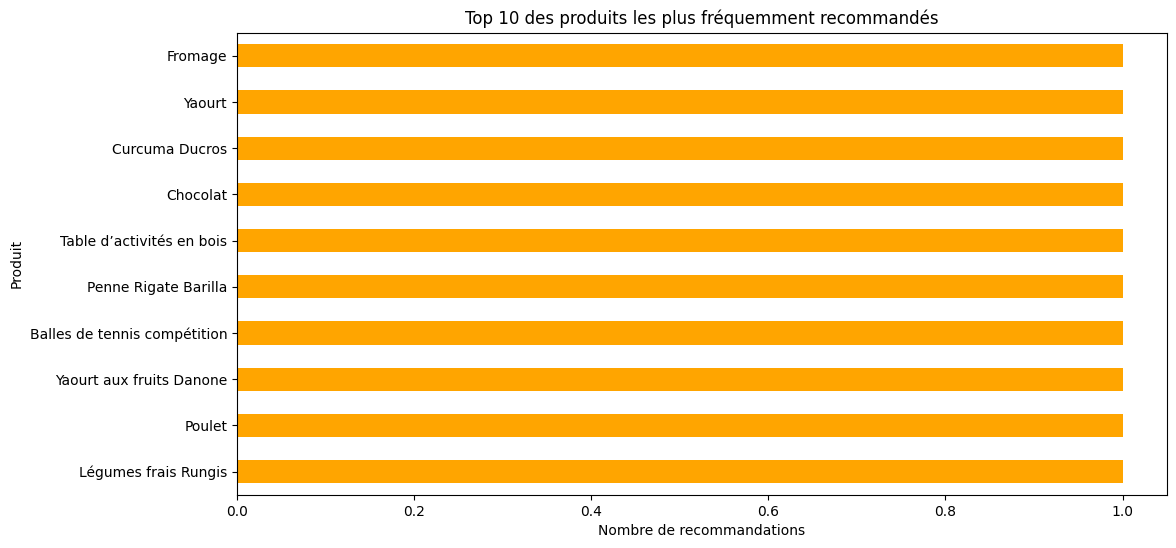

In [17]:
# 5. Analyse des fournisseurs des produits recommandés
if not recommendations.empty:
    suppliers = pd.read_csv('dbo.Dim_Supplier.csv')


# 6. Fréquence des produits dans les recommandations (si vous testez plusieurs magasins)
all_recommendations = pd.concat([recommend_by_store(i) for i in range(1, 6)])
if not all_recommendations.empty:
    plt.figure(figsize=(12, 6))
    all_recommendations['ProductName'].value_counts().head(10).plot(kind='barh', color='orange')
    plt.title('Top 10 des produits les plus fréquemment recommandés')
    plt.xlabel('Nombre de recommandations')
    plt.ylabel('Produit')
    plt.show()